In [ ]:
!pip install transformers diffusers accelerate gradio

In [ ]:
from transformers import AutoFeatureExtractor, SegformerForSemanticSegmentation
import PIL
import requests
import torch
from io import BytesIO
from diffusers import DiffusionPipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn
import cv2
import numpy as np
import gradio as gr

In [ ]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

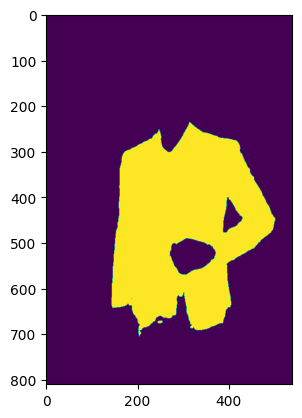

In [ ]:
extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

image = Image.open('input.jpeg')
inputs = extractor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
pred_seg[pred_seg != 4] = 0
plt.imshow(pred_seg)


In [ ]:
arr_seg = pred_seg.cpu().numpy().astype("uint8")
arr_seg *= 255
pil_seg = Image.fromarray(arr_seg)
pil_seg.save('mask.jpg')

In [ ]:
img = Image.open("mask.jpg") # get image
pixels = img.load() # create the pixel map
img=img.convert('RGBA')
for i in range(img.size[0]): # for every pixel:
    for j in range(img.size[1]):
        if pixels[i,j] != 0: # if not black:
            pixels[i,j] = 255 # change to white

img.show()
img.save('result.png')

In [ ]:
pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

vae/diffusion_pytorch_model.safetensors not found


In [ ]:
img = cv2.imread('result.png',0)
kernel = np.ones((10,10), np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 5)

cv2.imwrite('result.png', dilation)

True

In [ ]:
init_image = Image.open('dddddddd.jpg').resize((512,512)).convert('RGBA')
mask_image = Image.open('result.png').resize((512,512))
example_image = Image.open('1.jpg').resize((512,512)).convert('RGBA')

In [ ]:
image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image

In [ ]:
extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found
You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


In [ ]:
def predict(dict1,dict2):
  init_img =  dict1

  inputs = extractor(images=init_img, return_tensors="pt")

  outputs = model(**inputs)
  logits = outputs.logits.cpu()

  upsampled_logits = nn.functional.interpolate(
      logits,
      size=init_img.size[::-1],
      mode="bilinear",
      align_corners=False,
  )

  pred_seg = upsampled_logits.argmax(dim=1)[0]
  pred_seg[pred_seg != 4] = 0
  arr_seg = pred_seg.cpu().numpy().astype("uint8")
  arr_seg *= 255
  pil_seg = Image.fromarray(arr_seg)
  pil_seg.save('mask.jpg')
  img = Image.open("mask.jpg") # get image
  pixels = img.load() # create the pixel map
  img=img.convert('RGBA')
  for i in range(img.size[0]): # for every pixel:
      for j in range(img.size[1]):
          if pixels[i,j] != 0: # if not black:
              pixels[i,j] = 255 # change to white

  img.save('result.png')
  img = cv2.imread('result.png',0)
  kernel = np.ones((10,10), np.uint8)
  dilation = cv2.dilate(img,kernel,iterations = 5)

  cv2.imwrite('result.png', dilation)
  init_img=init_img.resize((512, 512)).convert("RGBA")
  mask_image = Image.open('result.png').resize((512,512))
  example_image = dict2.resize((512, 512)).convert("RGBA")

  res = pipe(image=init_img, mask_image=mask_image, example_image=example_image).images[0]
  return (res)


In [ ]:
gr.Interface(
    predict,
    title = 'TryOnAI',
    inputs=[
        gr.Image(label= 'person',source = 'upload', type = 'pil'),
        gr.Image(label= 'cloth',source = 'upload', type = 'pil')
    ],
    outputs = [
        gr.Image(label= 'output')
        ]
).launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5cc2b5548a48b85a53.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5cc2b5548a48b85a53.gradio.live
